# **Practice 12: Solving PDEs with finite differences**

## Advection-diffusion equation

A realistic description of pollutant transport in a river is given by the equation

$$U_t+v U_x=K U_{xx}$$

where $v$ is the river's velocity, and $K$ the diffusion coefficient. 

This is complemented with the boundary conditions

$$ U(0, t) = 0 \; \textrm{ and } \; \frac{\partial U}{\partial x}(100, t) = 0$$

and the initial condition

$$ U(x,0)=e^{-\frac{(x-10)^2}{8}}.$$


**Exercise:** 

1. Suppose that there is no diffusion ($K=0$) and that $v=5$. Solve the resulting equation using the finite differences method. In particular calculate the solution for times $t=5, 10, 15$ and $20$. Does it make sense?

2. What would happen if you interchange the boundary conditions?

3. Now suppse that $K=2$. Calculate the new solution at those same times.

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Utilmethods

In [10]:
def __tridiag(v1: float, v2: float, v3: float, N: int, k1: int = -1, k2: int = 0, k3: int = 1) -> np.ndarray:
    return np.diag(np.full(N-abs(k1), v1), k1) + np.diag(np.full(N-abs(k2), v2), k2) + np.diag(np.full(N-abs(k3), v3), k3)



def advection_diffusion_fwd(v, K, t0, tf, x0, xf, u0, k, h) -> np.ndarray:

    s = k/h

    x = np.arange(x0, xf+h, h)
    t = np.arange(t0, tf+h, h)

    LEN_X = len(x)
    LEN_T = len(t)

    v1 = K*s/h
    v2 = -2*K*s/h - v*s + 1
    v3 = K*s/h -v*s
    
    m = __tridiag(v1, v2, v3, LEN_X)

    sol = np.zeros((LEN_X, LEN_T))
    sol[:, 0] = u0(x)

    for ti in range(1, LEN_T):
        sol[:, ti] = m@sol[:, ti-1]
    
    return sol, x, t

def advection_diffusion_bwd(v, K, t0, tf, x0, xf, u0, k, h) -> np.ndarray:

    s = k/h

    x = np.arange(x0, xf+h, h)
    t = np.arange(t0, tf+h, h)

    LEN_X = len(x)
    LEN_T = len(t)

    v1 = v*s + K*s/h
    v2 = -2*K*s/h - v*s + 1
    v3 = K*s/h
    
    m = __tridiag(v1, v2, v3, LEN_X)

    sol = np.zeros((LEN_X, LEN_T))
    sol[:, 0] = u0(x)

    # Boundary conditions
    sol[0, 0] = 0
    # ---

    for ti in range(1, LEN_T):

        sol[:, ti] = m@sol[:, ti-1]
    
    return sol, x, t

## Question 1

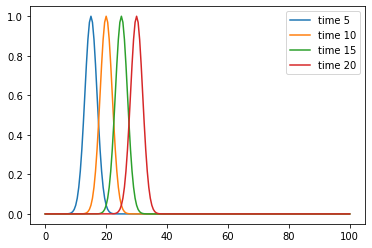

In [12]:

for ti in (5, 10, 15, 20):
    sol, x, t = advection_diffusion_bwd(v=5, K=0, t0=0, tf=ti, x0=0, xf=100, u0=lambda x: np.exp(-(x-10)**2/8), k=0.1, h=0.5)

    plt.plot(x, sol[:, -1], label=f'time {ti}')
    plt.legend()


## Question 2

In [ ]:
# Here the boundary conditions are reversed

## Question 3

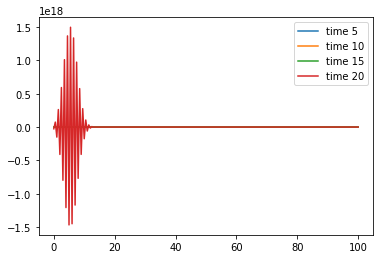

In [21]:
for ti in (5, 10, 15, 20):
    sol, x, t = advection_diffusion_bwd(v=5, K=2, t0=0, tf=ti, x0=0, xf=100, u0=lambda x: np.exp(-(x-10)**2/8), k=0.1, h=0.5)

    plt.plot(x, sol[:, -1], label=f'time {ti}')
    plt.legend()